# 2D RFIM

## Initializing Spins 

<IPython.core.display.Javascript object>


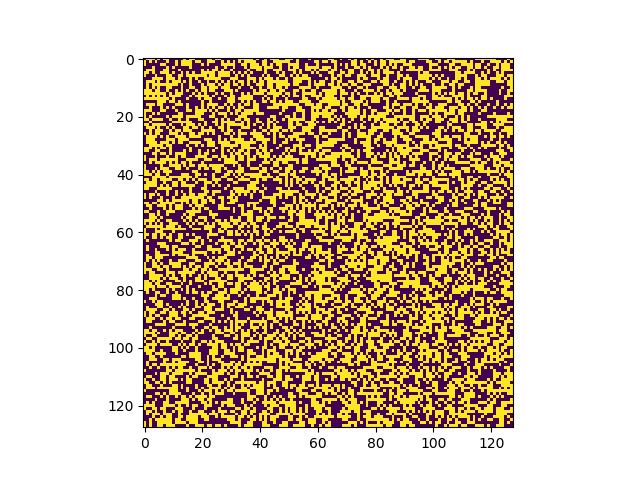

In [10]:
import numpy as np
import glob
import pandas as pd
import time
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
L=128
spin = np.random.randint(2,size=(L,L))*2.0-1.0
plt.figure()
plt.imshow(spin)

## Initializing random fields

<IPython.core.display.Javascript object>


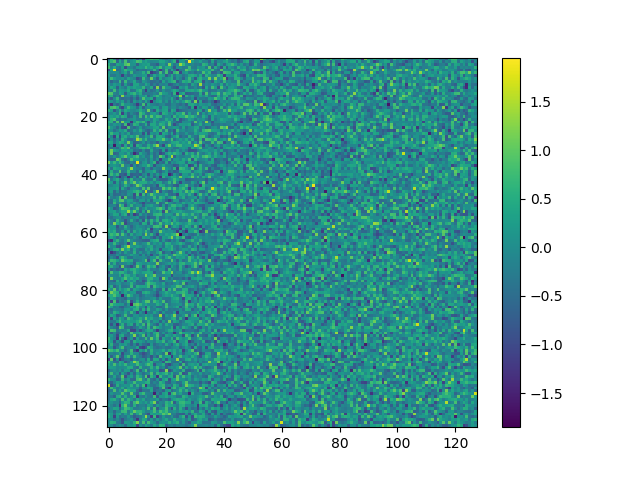

In [6]:
R=0.5
h = np.random.normal(0,R,size=(L,L))
plt.figure()
plt.imshow(h)
plt.colorbar()

## Initializing checkerboard sites

<IPython.core.display.Javascript object>


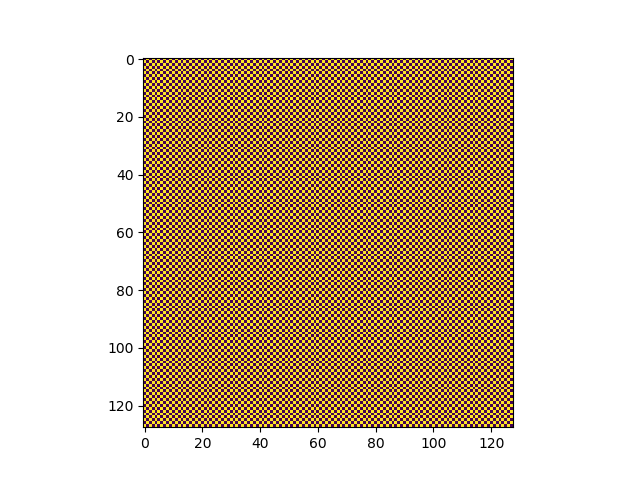

In [7]:
checkerboard = np.zeros((L,L))
for i in range(L):
    for j in range(L):
        checkerboard[i,j] = (i+j)%2
plt.figure()
plt.imshow(checkerboard)

### Check

<IPython.core.display.Javascript object>


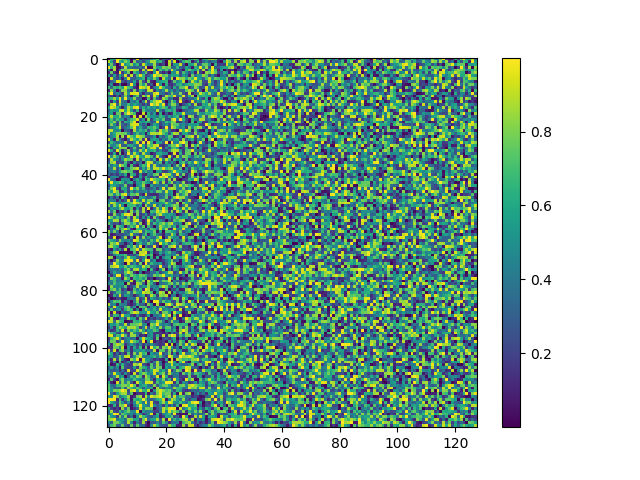

In [8]:
r = np.random.uniform(0,1,size=(L,L))
plt.figure()
plt.imshow(r)
plt.colorbar()

## Metropolis checkerboard updates

<IPython.core.display.Javascript object>


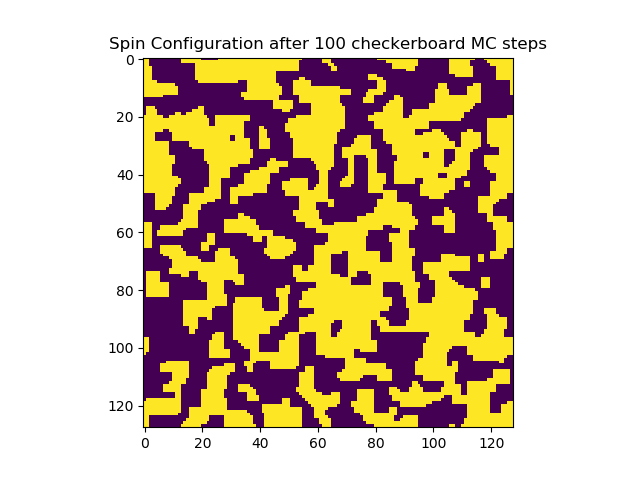

In [12]:
black_or_white = 0
T = 0.1                            # Temperature
total_steps = 100
MC_step = 1
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
plt.imshow(spin)
fig.canvas.draw()
time.sleep(0.9)
spin_configs = []
spin_configs.append(spin)
for i in range(total_steps):
    delta_E = -2*spin*(np.roll(spin,1,axis=0)+np.roll(spin,-1,axis=0)+np.roll(spin,1,axis=1)+np.roll(spin,-1,axis=1) + h)
    
    prob = np.exp(delta_E/T) *  np.where(checkerboard==black_or_white,0.0,1.0)
    
    r = np.random.uniform(0,1,size=(L,L))
#     plt.imshow(prob>r)    
    
    spin = np.where(prob>r, -spin, spin)
    black_or_white = 1-black_or_white
    
    if (i+1)%100==0:
        spin_configs.append(spin)
        plt.imshow(spin,vmin=-1,vmax=1)
        ax.set_title( 'Spin Configuration after '+str(i+1)+' checkerboard MC steps')
        fig.canvas.draw() 

plt.close()

## Replotting the configurations

<IPython.core.display.Javascript object>


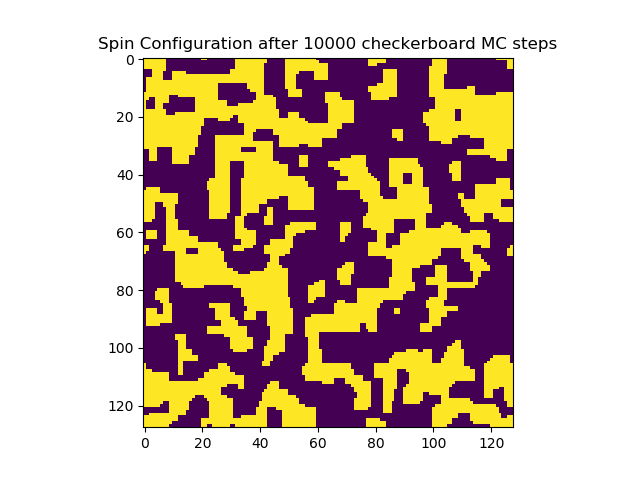

In [12]:
delay=0.01
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
for i in range(np.shape(spin_configs)[0]):
    plt.imshow(spin_configs[i],vmin=-1,vmax=1)
    ax.set_title( 'Spin Configuration after '+str(i*MC_step)+' checkerboard MC steps')
    fig.canvas.draw() 
    time.sleep(delay)
plt.close()